<a href="https://colab.research.google.com/github/anhtr/freeCodeCamp_projects/blob/master/scientific_computing_with_python/02_networking_and_web_services.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Networking with Python**
- See www.net-intro.com for more details on network architecture.
- TCP = Transport control protocol
- Python has built-in support for TCP sockets

In [ ]:
import socket
mysock = socket.socket(socket.AF_INET, socket.SOCK_STREAM) # making a socket
mysock.connect(('data.pr4e.org', 80)) # host, port

What do we want to do with socket? What we are going to send and get back? => internet protocols

Protocol:
- A set of rule that all parties follow so we can predict each other's behavior, and not bump to each other.
- Eg. driving on right hand side in the US or left hand side in the UK.

HTTP (Hypertext transfer protocol)
- Dominant Application Layer Protocol on the internet
- Extended o be data in addtion to documents (RSS, Web services...)
- Basic concept: Make a connection -> Request a document -> Retrieve the document -> close the connection
- "http://": protocol, "www.dr-chuck.com": host, "/page1.htm": document.
- Making an HTTP request:
  + connect to a server like www.dr-chuck.com
  + request a document (GET http://dr-chuck.com/page1.htm HTTP/1.0)

Internet standards:
- Standards for all internet protocols are developed by IETF.
- Standards are called "RCFs" (Request for Comments)

Networking: Write a web browser


In [7]:
import socket

mysock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
mysock.connect(('data.pr4e.org', 80))
cmd = 'GET http://data.pr4e.org/romeo.txt HTTP/1.0\r\n\r\n'.encode()
mysock.send(cmd)

while True:
    data = mysock.recv(512)
    if len(data) < 1:
        break
    print(data.decode(),end='')
mysock.close()

HTTP/1.1 200 OK
Date: Fri, 04 Jun 2021 15:38:06 GMT
Server: Apache/2.4.18 (Ubuntu)
Last-Modified: Sat, 13 May 2017 11:22:22 GMT
ETag: "a7-54f6609245537"
Accept-Ranges: bytes
Content-Length: 167
Cache-Control: max-age=0, no-cache, no-store, must-revalidate
Pragma: no-cache
Expires: Wed, 11 Jan 1984 05:00:00 GMT
Connection: close
Content-Type: text/plain

But soft what light through yonder window breaks
It is the east and Juliet is the sun
Arise fair sun and kill the envious moon
Who is already sick and pale with grief


Networking: Text processing
- ASCII:
  + Each charater presented by a number between 0 and 256 stored in 8 bits of memory.
  + the `ord()` function tells us the numeric value of a simple ASCII character. This number is how Python sort strings.
- Multi-byte characters: present wide range of characters
  + UTF-16: fixed length, 2 bytes
  + UTF-32: fixed length, 4 bytes
  + UTF-8: 1-4 bytes
    - Upwards compatible with ASCII
    - Automatic detection between ASCII and UTF-8
    - Recommended practice for encoding data to be exchanged between systems.
- In python 3:
  + String in Python 3 is unicode, but the other source can be others. Need to be aware and careful.
  + We send bytes to external sources, so we need to `encode` python 3 strings into a given character encoding.
  + When reading data from an external source, we need to `decode` into strings.

  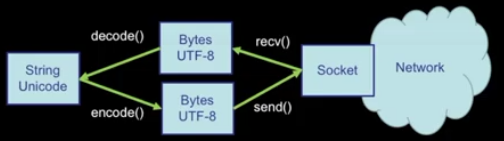

In [8]:
print(ord('H'))
print(ord('e'))
print(ord('\n'))

72
101
10


Networking: Using urllib in Python
- Does all the socket work.

In [10]:
import urllib.request, urllib.parse, urllib.error
fhand = urllib.request.urlopen('http://data.pr4e.org/romeo.txt')
for line in fhand:
  print(line.decode().strip())

But soft what light through yonder window breaks
It is the east and Juliet is the sun
Arise fair sun and kill the envious moon
Who is already sick and pale with grief


In [12]:
import urllib.request, urllib.parse, urllib.error
fhand = urllib.request.urlopen('http://www.dr-chuck.com/page1.htm')
for line in fhand:
  print(line.decode().strip())

<h1>The First Page</h1>
<p>
If you like, you can switch to the
<a href="http://www.dr-chuck.com/page2.htm">
Second Page</a>.
</p>


Networking: Web scraping with Python
- Web scraping is when a script pretends to be a browser and retrieves web pacges, looks at them, extracts information, and then looks at more webpages.
- Why: pull data, who links to whom, get own data back from some system that has no "export capability", monitor site for new info, make database for search engine.
- Parsing HTML is hard but we can use a library called Beautiful Soup.

**Using Web Services**
Data on the web:
- We need to have an agreed way to represent data going between application and across networks.
- XML and JSON are popular.

XML: eXtensible Markup Language
- Primary purpose is to help information systems share structured data.
- Designed to be relatively human readable.
- Terminology:
  + Tags: indicate the beginning and ending of elements
  + Attributes: keyword/value pairs on the opening tag of XML
  + Serialize/de-serialzie: Convert data in one program into a common format that can be stored and/or transmitted between systems in a programming language-independent manner.
- Basics:

  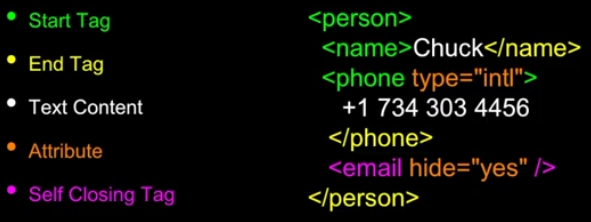

  + White space: Line ends do not matter. White space is generally discarded on text elements. We indent only to be readable.
- XML Elements/Nodes:
  + Simple element
  + Complex element: Contain simple elements
- XML as a tree:

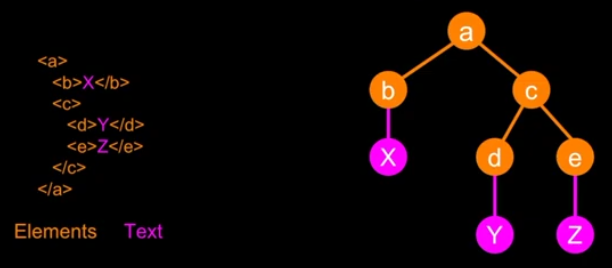

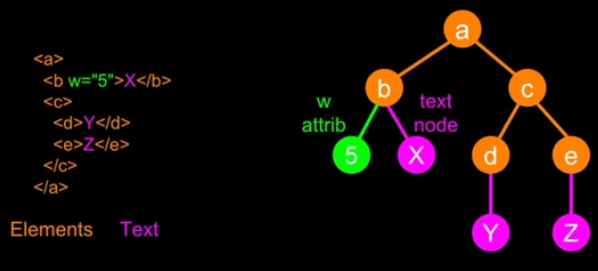

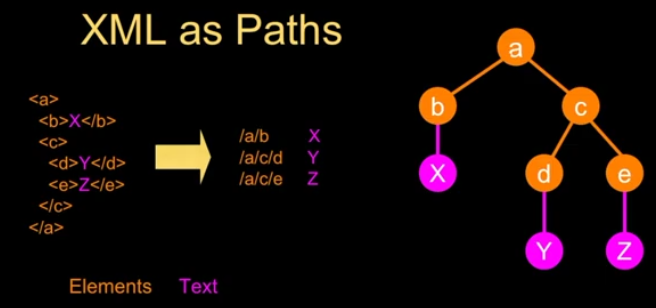

- XML Schema: describing a "contract" as to what is acceptable XML.

JSON: JavaScript Object Notation
- XML is better for rich hierarchical documents. JSON is for pulling data out of a system and moving it between two systems.
- JSON represents data as nested "list" and "dictionary".


In [15]:
import json
data = '''
  [
    { "id" : "001",
      "x" : "2",
     "name" : "Quincy"
    } ,
    { "id" : "009",
      "x" : "7",
      "name" : "Mrugesh"
    }
  ]
'''
info = json.loads(data)
print(info[1]['name'])

Mrugesh


Service Oriented Approach and API:
- Most non-trivial web applications use services from other applications.
- Services publish the "rules" application must follow to make use of the service (API)
- API: Application program interface